In [179]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy.optimize import curve_fit
%matplotlib inline

print('Paquetes importados con Exito')


Paquetes importados con Exito


# Tarea 3: Encuentre la regresión

Ud recibe unos datos $x$ y $y$ cómo se muestran a continuación. Ud debe responder cuatro preguntas a partir de estos datos. Suponga que ud tiene un modelo tal que $y=f(x)$ más aún desconoce $f$.

In [180]:
df = pd.read_pickle(r'C:\Users\marti\FISI2028-202120\soluciones\m.pelaez\tarea3\ex1.gz')

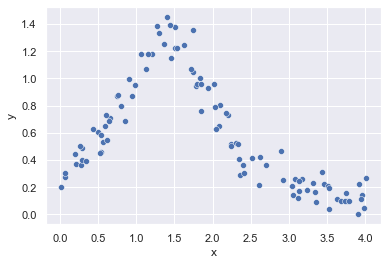

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [181]:
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df

## (A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?

In [175]:
# Se establecen los valores de Y y X para los datos recolectados del archivo
x = df["x"]
y = df["y"]

# Creacion de las listas para guardar los datos y facilitar manipulacion
xLst = []
yLst = []

print('Datos para x importados: ', len(x))
print('Datos para y importados: ', len(y))

Datos para x importados:  100
Datos para y importados:  100


In [176]:
#Se asigna los valores encontrados al arreglo creado anteriormente
for i in range(len(x)):
    if(0<=x[i]<=1.5):
        xLst.append(x[i])
        yLst.append(y[i])

# los arreglos en numpy son mas faciles de manejar 
xNp = np.array(xLst)
yNp = np.array(yLst)
        
print(xNp)
print(yNp)

[0.06585881 0.02093073 0.07031212 0.20616556 0.28657196 0.27096854
 0.19957703 0.29455413 0.26240308 0.33728572 0.4999516  0.56632758
 0.53351561 0.52050379 0.4341235  0.61297735 0.54045169 0.58791458
 0.65418762 0.59973738 0.64327662 0.79594304 0.74257997 0.76763688
 0.85442627 0.90891591 0.98562327 0.95099631 1.0602925  1.20330968
 1.1279353  1.1567111  1.26668196 1.36000017 1.29863443 1.43988698
 1.40932438 1.4547854 ]
[0.277413   0.20223851 0.30736916 0.36752961 0.4911441  0.36206372
 0.44152696 0.39796053 0.5037485  0.39484454 0.60627619 0.53261477
 0.4619857  0.44983331 0.62948187 0.54800951 0.58589306 0.64939208
 0.71055403 0.73153748 0.68724274 0.80091407 0.87367728 0.87498203
 0.6853341  0.99415383 0.95531561 0.87079991 1.18128653 1.17669019
 1.06726024 1.1807464  1.38465755 1.25625824 1.33501446 1.39675454
 1.45421145 1.15147462]


In [177]:
# Funcion para realizar regresion
def funcionRegresion(x,a,b):
    return a*x + b
popt, pcov = curve_fit(funcionRegresion, xNp, yNp)

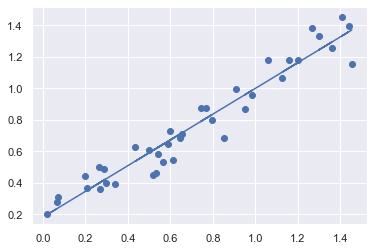

In [87]:
# Se extraen los datos en terminos de la funcion
datosFuncion = funcionRegresion(xNp,popt[0],popt[1])

# Datos graficados
plt.scatter(xNp,yNp)

# Linea de tendencia graficada en la misma grafica
plt.plot(xNp,datosFuncion)

In [89]:
# Informacion relevante para la regresion
print('== DATOS REGRESION ==')
print('-Pendiente: ', popt[0])
print('-Intersecto en X=0: ',popt[1])
print('-Ajuste r: ', 1-np.sum((datosFuncion-yNp)**2)/np.sum((yNp-yNp.mean())**2))


== DATOS REGRESION ==
-Pendiente:  0.8163869624029936
-Intersecto en X=0:  0.18270690829168224
-Ajuste r:  0.9316416262309236


## (B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,
$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$
Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores

In [61]:
# Se crea un arreglo bidimensional para guardar todos los datos de la evaluacion de la funcion
Poli = []

# Se asignan los datos a la funcion

for i in range(len(x)):
    Poli.append([1, x[i], x[i]**2, x[i]**3, x[i]**4, x[i]**5])

# Matrices en numpy son mas faciles de manejar
PoliNp = np.matrix(Poli)
len(PoliNp)

100

In [62]:
PoliNpY = np.array([y]).reshape(-1,1)
b = np.matrix(PoliNpY)
print(len(PoliNp))
print(len(PoliNpY))
print(len(b))

100
100
100


In [63]:
# Funcion para realizar regresion polinomial
def Fun2(x,PoliNp,b):
    m,n = PoliNp.shape
    X = np.matrix(x).T
    DB=(PoliNp*X-b)
    return (DB.T*DB)[0,0]/m
constantes = sp.optimize.minimize(fun=Fun2,x0=np.zeros(PoliNp.shape[1]), args = (PoliNp,b), tol=1e-5)
print("Las constantes para la polinomial es: ")
print(constantes['x'])

Las constantes para la polinomial es: 
[ 0.35734974 -0.84261518  3.78486299 -3.00345858  0.85846836 -0.08306076]


In [153]:
Graficar = np.linspace(0,4,100)
def fun1_(b1,b2,b3,b4,b5,b6,x):
    return b1*x**5 + b2*x**4 + b3*x**3 + b4*x**2 + b5*x + b6

FunEnY= fun1_(constantes['x'][5],constantes['x'][4],constantes['x'][3],constantes['x'][2],constantes['x'][1],constantes['x'][0],Graficar)

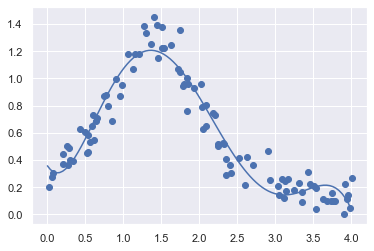

In [154]:
plt.plot(Graficar,FunEnY)
plt.scatter(x,y)

In [164]:
print('== DATOS REGRESION ==')
print("-Ajuste: ", 1-np.sum((FunEnY-y)**2)/np.sum((y-y.mean())**2))
print("-Intercepto en 0", constantes['x'][0])
print("-Las constantes para la polinomial son: ", constantes['x'])
print("-COMPARACION: A pesar de que se esta utilizando un modelo polinomico, la naturaleza de los datos es lineal, por lo que el ajuste para la curva permanece más adecuado para un ajuste lineal (r lineal 0.93... vs ajuste polinomial 0.91...)")

== DATOS REGRESION ==
-Ajuste:  0.9111053476470856
-Intercepto en 0 0.3573497402416187
-Las constantes para la polinomial son:  [ 0.35734974 -0.84261518  3.78486299 -3.00345858  0.85846836 -0.08306076]
-COMPARACION: A pesar de que se esta utilizando un modelo polinomico, la naturaleza de los datos es lineal, por lo que el ajuste para la curva permanece más adecuado para un ajuste lineal (r lineal 0.93... vs ajuste polinomial 0.91...)


## (C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección **(B)**.

Calcule $f(0)$ y compare con los resultados anteriores.

> Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a *Fourier*!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [132]:
Y = df.loc[:, ['y']]



In [133]:
X = df.loc[:, ['x']].rename(columns={'x': 'x1'})
X.insert(0, 'x0', 1)
X['x2'] = X['x1']*X['x1']

In [ ]:
#Los arreglos son mas faciles de manejar en Numpy
xNp = np.array(x).reshape(-1,1)

yNp = np.array(y)

Lst = np.array([np.ones([len(x), 1]),xNp ,xNp**2, xNp**3, xNp**4, xNp**5]).reshape(6, len(x)).T

vlst = np.linalg.inv(Lst.T @ Lst) @ Lst.T @ y

In [148]:


#Funcion con constantes polinomicas
def fun3(B1,B2,B3,B4,B5,B6,x):
    return B1*x**5 + B2*x**4 + B3*x**3 + B4*x**2 + B5*x + B6
FunEnY3 = fun3(vlst[5],vlst[4],vlst[3],vlst[2],vlst[1],vlst[0],Graficar)

print(len(x))
print(len(FunEnY3))
print(len(Graficar))


100
100
100


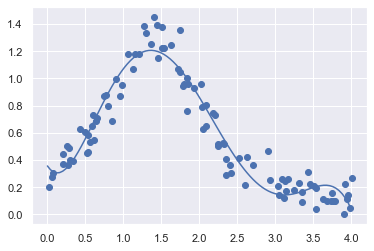

In [149]:
# Graficamos

plt.plot(Graficar,FunEnY3)
plt.scatter(x,y)

In [152]:
print('== DATOS REGRESION ==')
print("Las constantes Polinomiales son:",vlst)
print("El intercepto en 0 es:", vlst[0])
print("-COMPARACION: A pesar de que se esta utilizando un modelo polinomico en esta regresion y la anterior el ajuste es muy similar ebtre la exacta y la polinomial convencional, la naturaleza de los datos es lineal, por lo que el ajuste para la curva permanece más adecuado para un ajuste lineal (r exacta 0.91... vs ajuste polinomial 0.91...)")

== DATOS REGRESION ==
Las constantes Polinomiales son: [ 0.35644668 -0.83588268  3.77276401 -2.99526012  0.85614705 -0.08282854]
El intercepto en 0 es: 0.35644668482349123
-COMPARACION: A pesar de que se esta utilizando un modelo polinomico en esta regresion y la anterior el ajuste es muy similar ebtre la exacta y la polinomial convencional, la naturaleza de los datos es lineal, por lo que el ajuste para la curva permanece más adecuado para un ajuste lineal (r exacta 0.91... vs ajuste polinomial 0.91...)


## (D) Regresión a un modelo teórico

Suponga que su modelo teórico es el siguiente:
$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$
Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

In [43]:
def f(C,x):
    return (C[0])/((x-C[1])**2 + C[2])**C[3]

In [156]:
def Lfit(K,x,y):
    DY=f(K,x) - y
    return np.dot(DY,DY)/len(y)

In [168]:
constantes4 = sp.optimize.minimize(fun=Lfit, x0=np.array([0,0,1,0]), args = (x,y), method='L-BFGS-B', tol=1e-5)

funEnY4 = f(constantes4.x,x)

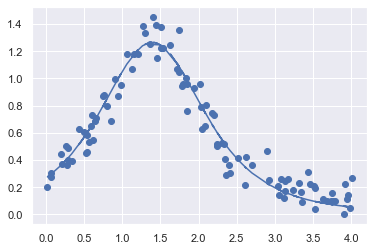

In [178]:
plt.scatter(x,y)
plt.plot(x,funEnY4)

In [170]:
print('== DATOS REGRESION ==')
print("-Ajuste: ", 1-np.sum((funEnY4-y)**2)/np.sum((y-y.mean())**2))
print("-Intercepto en 0", f(constantes4.x,0))
print("-Las constantes para la ecuacion son: ", constantes4['x'])
print("-COMPARACION: Gracias a el uso de plot podemos ver que hay una descontinuidad en el maximo de la funcion,e esto se puede deber al error computacional, pero lo mas importantes es que segun nuestra regresion el ajuste de esta funcion es superior al de la regresion polinomial (ajuste = 0.94 vs ajuste =0.93) por lo que podemos concluir que esta ecuacion define la funcion")

== DATOS REGRESION ==
-Ajuste:  0.9372778673910886
-Intercepto en 0 0.2674879566968516
-Las constantes para la ecuacion son:  [2.3470072  1.39333437 1.41005721 1.79580009]
-COMPARACION: Gracias a el uso de plot podemos ver que hay una descontinuidad en el maximo de la funcion,e esto se puede deber al error computacional, pero lo mas importantes es que segun nuestra regresion el ajuste de esta funcion es superior al de la regresion polinomial (ajuste = 0.94 vs ajuste =0.93) por lo que podemos concluir que esta ecuacion define la funcion
